In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Laplacian_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,3280575,3144915,2707590,2301885,2106045,1891590,1785510,1748280,1665150,1575900,...,2458200,2527815,2621655,3295875,2804745,1945140,1633275,1953555,2412555,1
1,3219120,2592585,2254200,2160870,2123895,2123895,1980075,1828605,2140215,2262105,...,2994465,2716005,2276385,2793780,3319845,2435760,2159850,2058615,2010930,1
2,4644825,4378605,4139925,4280175,4444650,4151655,4120545,4174860,4174095,4527270,...,4463265,4516305,4677465,4939605,4854690,4520385,4433685,4458165,4575975,1
3,2279445,2429640,2699175,2993955,2389605,2426325,2762925,2395215,2418675,2890935,...,17085,17085,17085,11985,241230,128265,22440,23460,24225,1
4,4416855,3629925,2853705,2403885,3245640,3746970,3165315,4081275,4250850,4007580,...,5141565,4381665,4389315,5556705,2964630,2942700,4444395,2815200,2188920,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8630952380952381
              precision    recall  f1-score   support

          -1       0.90      0.94      0.92       142
           1       0.57      0.46      0.51        26

    accuracy                           0.86       168
   macro avg       0.74      0.70      0.72       168
weighted avg       0.85      0.86      0.86       168



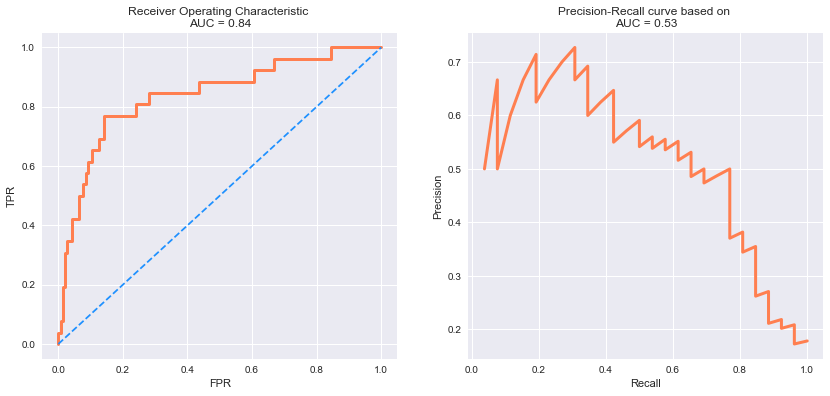

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()